In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing()

data = pd.DataFrame(data= np.c_[california_housing['data'], california_housing['target']], columns= california_housing['feature_names'] + ['MedianHouseValue'])

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Цены на дома в Калифорнии

## 1. Распределение цены домов в зависимости от расположения, численности населения

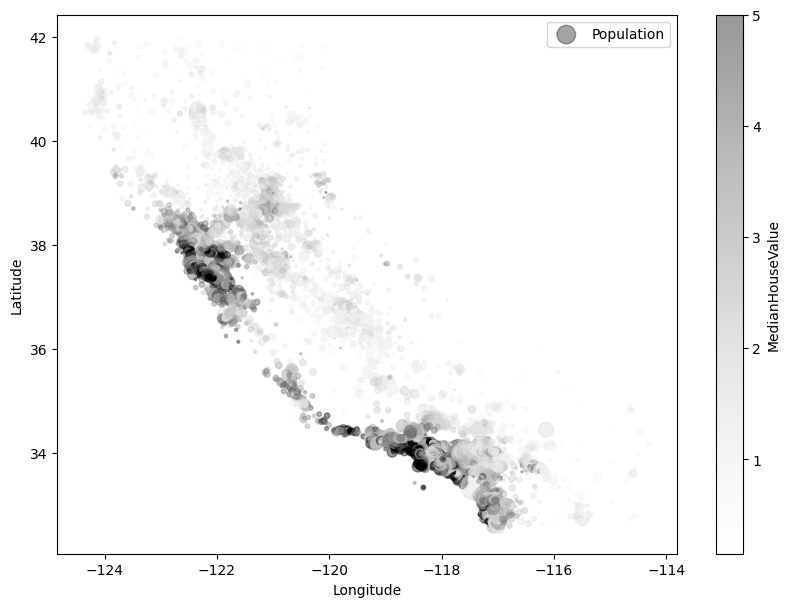

In [4]:
# Неправильный
# Ошибка выбора стиля (точнее его отсутствия и использование дефолтного стиля)
data.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    s=data["Population"] / 100,
    label="Population",
    figsize=(10, 7),
    c="MedianHouseValue",
    colorbar=True,
)
plt.legend()

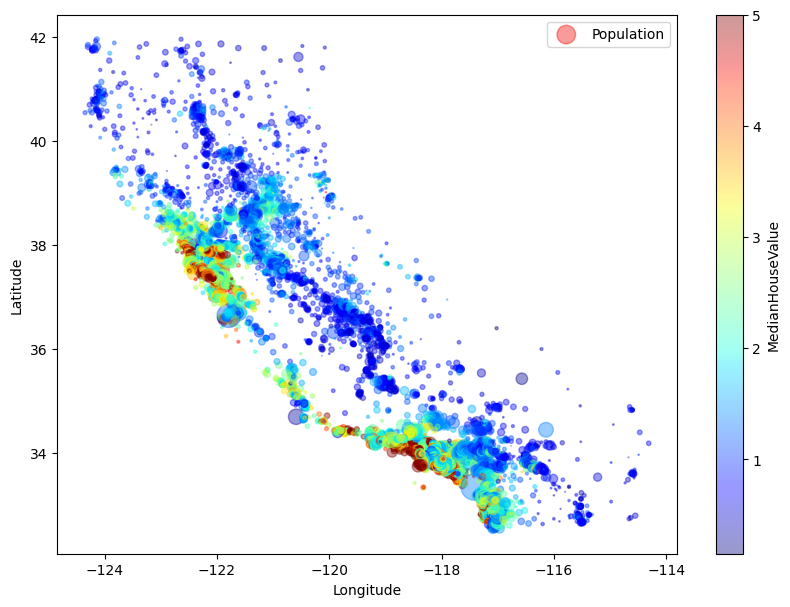

In [5]:
# Правильный
# Выбрана яркая цветовая гамма, для передачи цены на дома
# Чем выше цена, тем краснее цвет
data.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    s=data["Population"] / 100,
    label="Population",
    figsize=(10, 7),
    c="MedianHouseValue",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)
plt.legend()

## 2. Категории дохода

<AxesSubplot:>

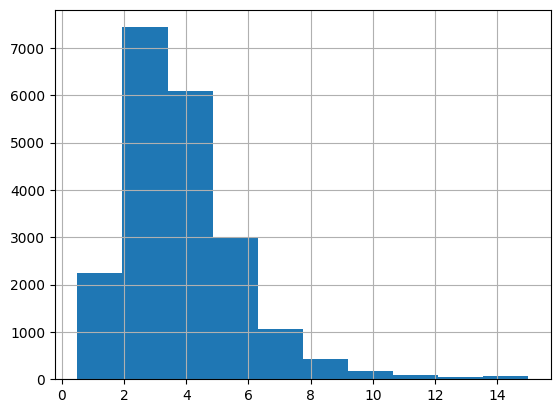

In [6]:
# Неправильный
# 1. Столбцы сливаются друг с другом и не видно разделения
# 2. Нет ограничения категорий. Т.е. при добавлении нового медианного дохода будет увеличиваться хвост
data["MedInc"].hist()

<AxesSubplot:>

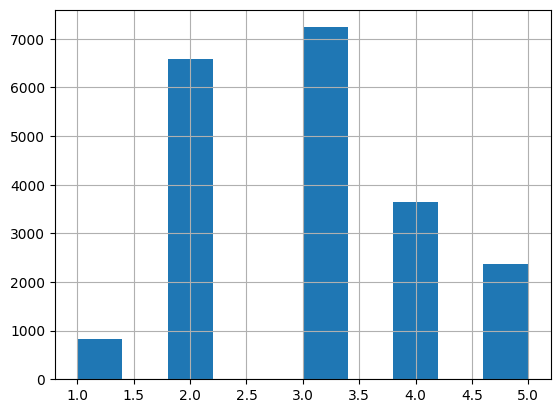

In [7]:
# Правильный
# 1. Категорий меньше, но они крупные
# 2. Число категорий ограничено
data["IncCat"] = np.ceil(data["MedInc"] / 1.5)
data["IncCat"].where(data["IncCat"] < 5, 5.0, inplace=True)
data["IncCat"].hist()

## 3. Матрица рассеяния

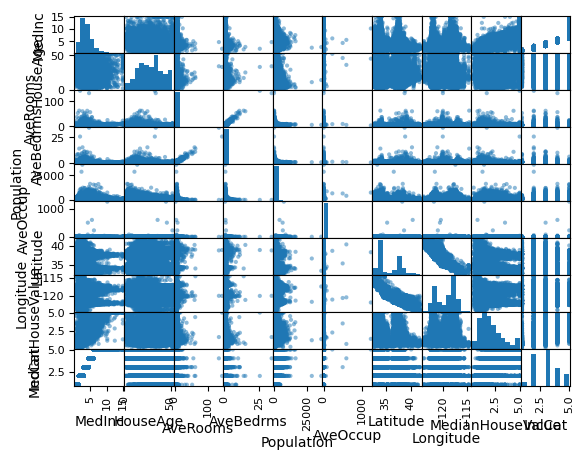

In [11]:
# Неправильный
# График нечитабельный
_ = pd.plotting.scatter_matrix(data)

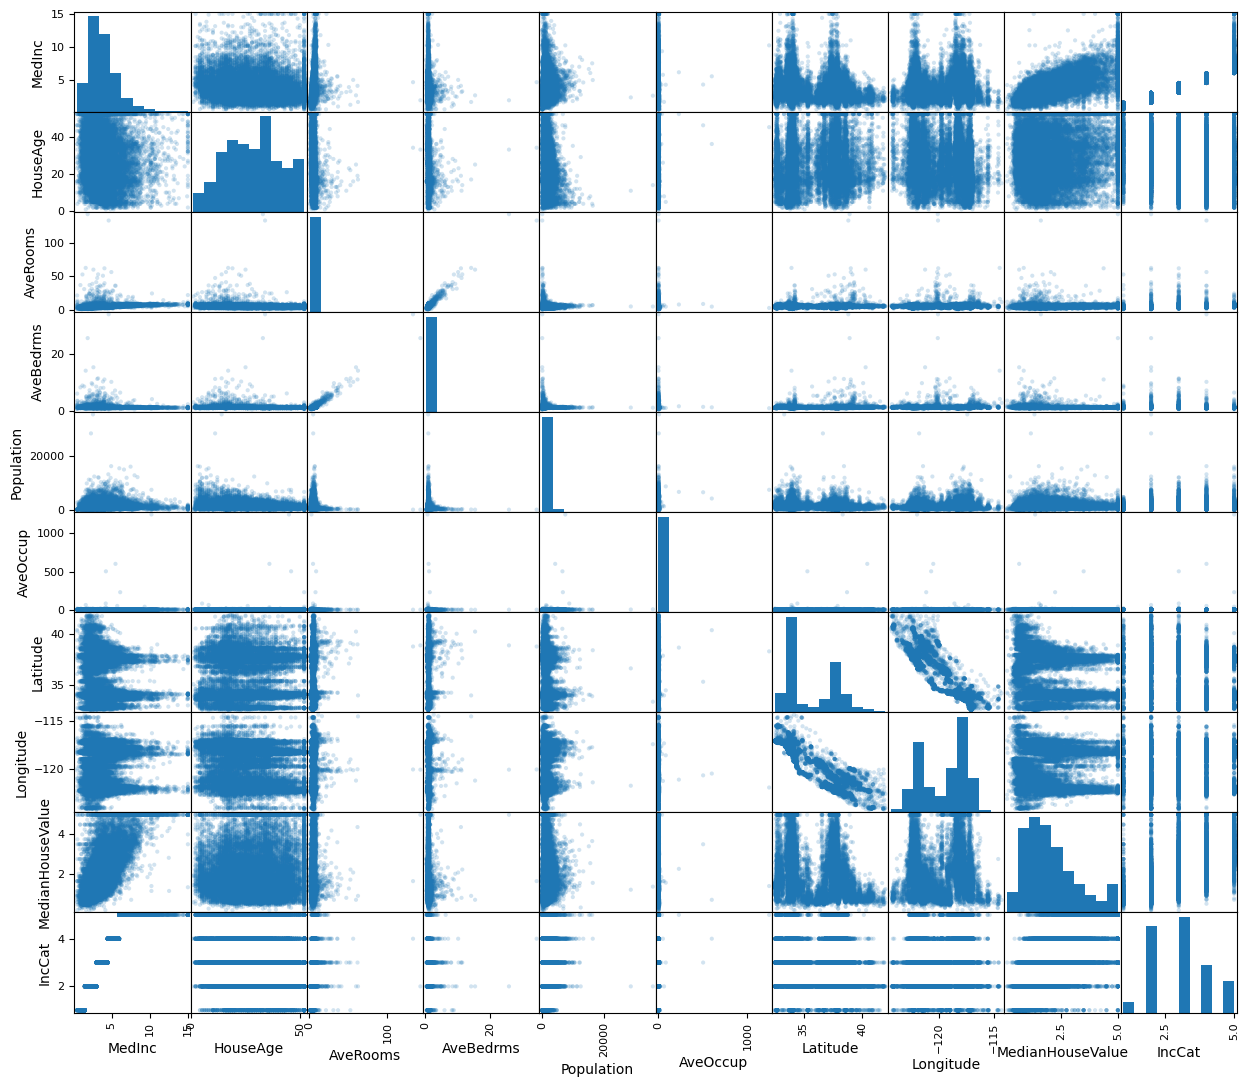

In [15]:
# Правильный
_ = pd.plotting.scatter_matrix(data, figsize=(15, 13), alpha=0.2)